In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 5

In [11]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 14 classes.


In [12]:
class_names = dataset.class_names
class_names

['Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [13]:
len(dataset)

645

In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 0  9  4  2  8 10  0  0  8  1 10  8 11  9  5  0  6  4 11  4  0  8  0  0
  0  9  6  4  7  4  4  8]


In [15]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[138. 127. 135.]
  [126. 115. 123.]
  [111. 100. 108.]
  ...
  [112.  99. 108.]
  [117. 104. 113.]
  [109.  96. 105.]]

 [[131. 120. 128.]
  [127. 116. 124.]
  [122. 111. 119.]
  ...
  [112.  99. 108.]
  [118. 105. 114.]
  [111.  98. 107.]]

 [[121. 110. 118.]
  [121. 110. 118.]
  [122. 111. 119.]
  ...
  [115. 102. 111.]
  [123. 110. 119.]
  [114. 101. 110.]]

 ...

 [[147. 137. 146.]
  [140. 130. 139.]
  [141. 131. 140.]
  ...
  [156. 146. 155.]
  [165. 155. 164.]
  [158. 148. 157.]]

 [[149. 139. 148.]
  [136. 126. 135.]
  [142. 132. 141.]
  ...
  [165. 155. 164.]
  [139. 129. 138.]
  [153. 143. 152.]]

 [[159. 149. 158.]
  [143. 133. 142.]
  [138. 128. 137.]
  ...
  [174. 164. 173.]
  [125. 115. 124.]
  [167. 157. 166.]]], shape=(256, 256, 3), dtype=float32)


In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[120. 115. 112.]
  [107. 102.  99.]
  [113. 108. 105.]
  ...
  [150. 145. 142.]
  [151. 146. 143.]
  [152. 147. 144.]]

 [[108. 103. 100.]
  [108. 103. 100.]
  [119. 114. 111.]
  ...
  [151. 146. 143.]
  [152. 147. 144.]
  [153. 148. 145.]]

 [[120. 115. 112.]
  [122. 117. 114.]
  [118. 113. 110.]
  ...
  [157. 152. 149.]
  [157. 152. 149.]
  [155. 150. 147.]]

 ...

 [[123. 118. 115.]
  [122. 117. 114.]
  [118. 113. 110.]
  ...
  [135. 129. 131.]
  [136. 130. 132.]
  [137. 131. 133.]]

 [[111. 106. 103.]
  [113. 108. 105.]
  [112. 107. 104.]
  ...
  [137. 131. 133.]
  [138. 132. 134.]
  [140. 134. 136.]]

 [[128. 123. 120.]
  [131. 126. 123.]
  [129. 124. 121.]
  ...
  [142. 136. 138.]
  [143. 137. 139.]
  [145. 139. 141.]]]


In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


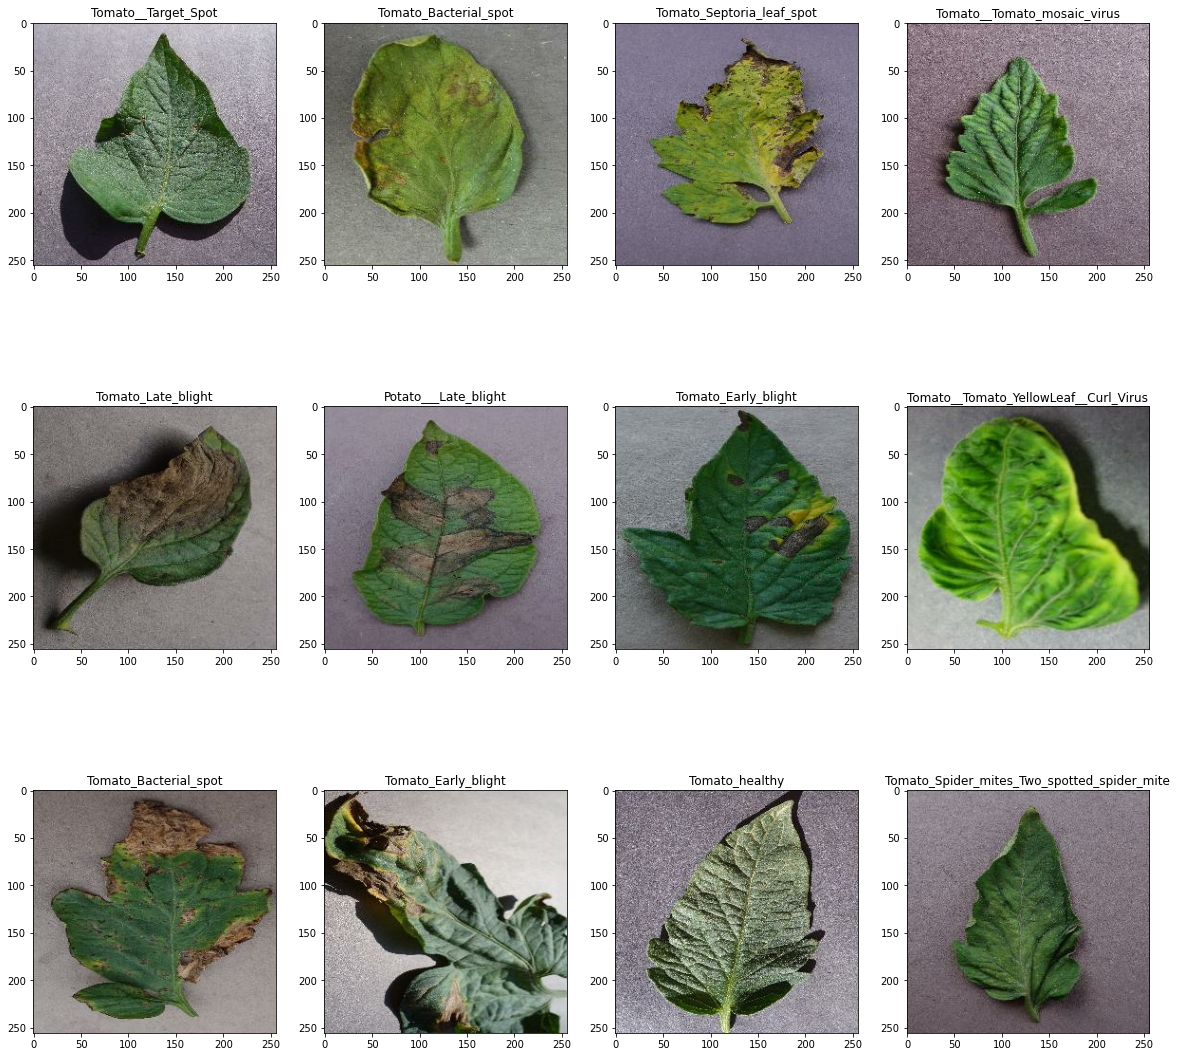

In [18]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
    

In [19]:
len(dataset)

645

In [20]:
train_size = 0.8
len(dataset)*train_size

516.0

In [21]:
train_ds = dataset.take(516)
len(train_ds)

516

In [22]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [23]:
val_size = 0.1
len(dataset)*val_size

64.5

In [24]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [25]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [26]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [27]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds)

516

In [29]:
len(val_ds)

64

In [30]:
len(test_ds)

65

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [54]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
516/516 [==============================] - 1720s 3s/step - loss: 1.9706 - accuracy: 0.3385 - val_loss: 1.9174 - val_accuracy: 0.3921
Epoch 2/5
516/516 [==============================] - 1516s 3s/step - loss: 1.1829 - accuracy: 0.6045 - val_loss: 1.3493 - val_accuracy: 0.5669
Epoch 3/5
516/516 [==============================] - 1648s 3s/step - loss: 0.8300 - accuracy: 0.7146 - val_loss: 1.2162 - val_accuracy: 0.6011
Epoch 4/5
516/516 [==============================] - 1899s 4s/step - loss: 0.6382 - accuracy: 0.7818 - val_loss: 1.0891 - val_accuracy: 0.6455
Epoch 5/5
516/516 [==============================] - 1627s 3s/step - loss: 0.5236 - accuracy: 0.8207 - val_loss: 1.0456 - val_accuracy: 0.6782


In [38]:
score = model.evaluate(test_ds)

65/65 [==============================] - 125s 649ms/step - loss: 1.0151 - accuracy: 0.6880


In [39]:
score

[1.0151195526123047, 0.6879807710647583]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

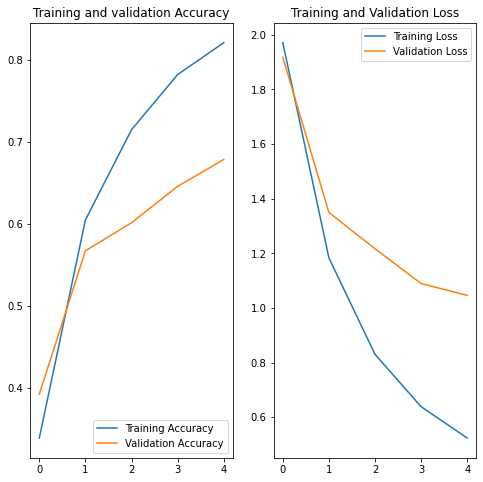

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
first image's actual label:  Tomato__Target_Spot
1/1 [==============================] - 1s 908ms/step
predicted label: Tomato_healthy


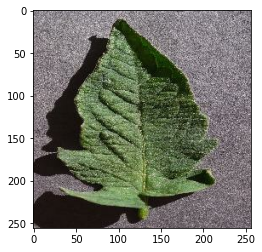

In [42]:
import numpy as np
for images_batch, labeks_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class

1/1 [==============================] - 0s 75ms/step


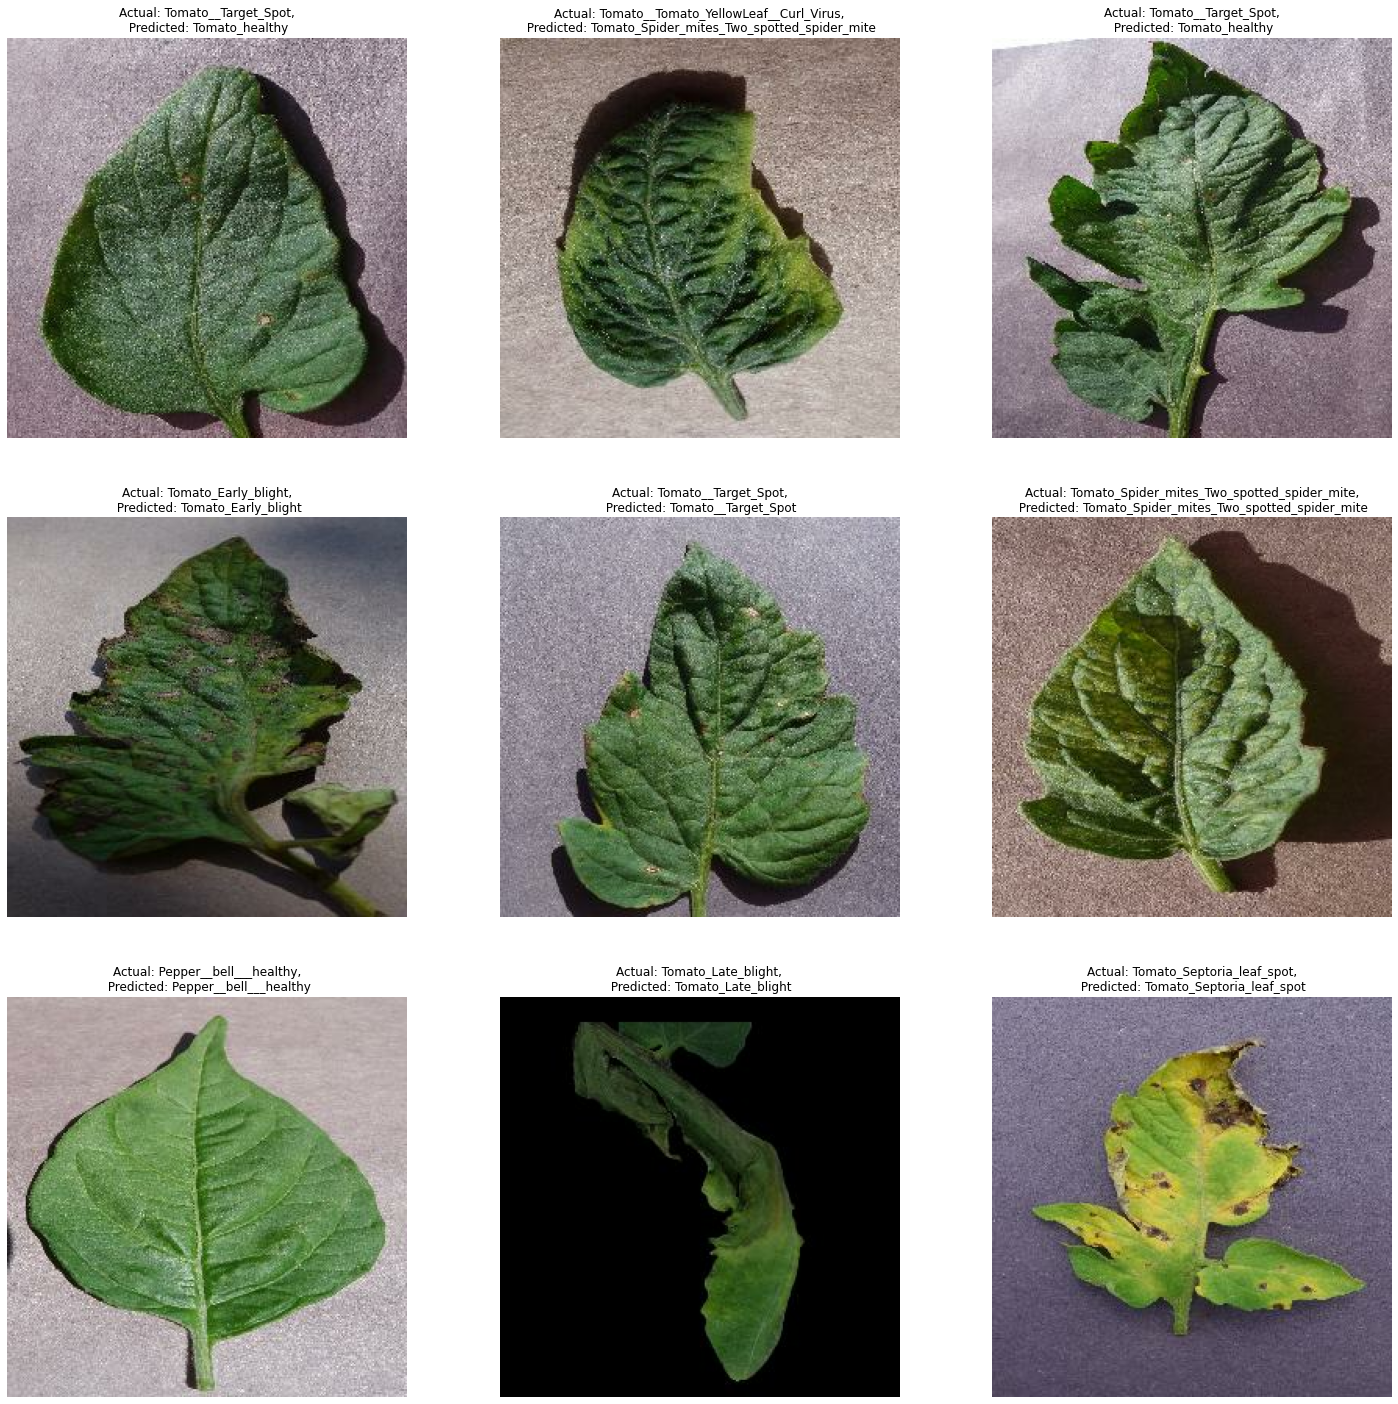

In [48]:
plt.figure(figsize=(25,25))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model, images[i].numpy)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

In [50]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
